In [75]:
import numpy as np
import urllib
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import random
import cv2
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb
import pandas as pd
import seaborn as sns

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [4]:
from sklearn.cluster import KMeans

In [76]:
#We could adjust those number up to 960
orange_link = "https://images.squarespace-cdn.com/content/v1/5a98653d96e76f7f7dc569c7/1652203191222-16N8MP7K7EACDQ1EVJ7E/shot_orange_marilyn_1964-19604.png?format=960w"
red_link = "https://images.squarespace-cdn.com/content/v1/5a98653d96e76f7f7dc569c7/1652203192094-MIQYNYEIJYJBY957F7T7/shot_red_marilyn_1964-19604.png?format=960w"
turq_link = "https://images.squarespace-cdn.com/content/v1/5a98653d96e76f7f7dc569c7/1652213792503-2Q9A294S9UOFEBQZQQNP/shot_turq_marilyn_1964-19604.png?format=960w"
blue_link = "https://images.squarespace-cdn.com/content/v1/5a98653d96e76f7f7dc569c7/1652203207667-AHQD95AZ4Z1MCZ5B4C0N/shot_blue_marilyn_1964-19604.png?format=960w"
eggblue_link = "https://images.squarespace-cdn.com/content/v1/5a98653d96e76f7f7dc569c7/1652203189304-UFR2YYN9605G0IW13YHJ/shot_eggblue_marilyn_1964-19604.png?format=960w"


# Download the image with URL
#response_orange = requests.get(orange_link) 
#orange = Image.open(BytesIO(response_orange.content))

#response_red = requests.get(red_link) 
#red = Image.open(BytesIO(response_red.content))

#response_turq = requests.get(turq_link) 
#turq = Image.open(BytesIO(response_turq.content))

#response_blue = requests.get(blue_link) 
#blue = Image.open(BytesIO(response_blue.content))

#response_eggblue = requests.get(eggblue_link) 
#eggblue = Image.open(BytesIO(response_eggblue.content))

## Orange picture

In [250]:
req = urllib.request.urlopen(orange_link)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is'

In [251]:
#images = [[orange, red, turq, blue, eggblue]]

#image = orange

# Convert image to matrix
image_matrix = np.array(img)

# Display the shape of the matrix
print(image_matrix.shape)

(960, 960, 4)


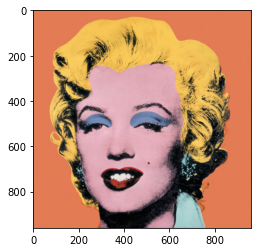

In [252]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

### background

In [253]:
# Define the coordinates of the region of interest (ROI)
x1, y1 = 0, 0  # Top-left corner
x2, y2 = 100, 100  # Bottom-right corner

# Crop the image
cropped_image = img[y1:y2, x1:x2]

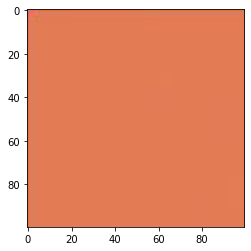

In [254]:
plt.imshow(cropped_image)
plt.show()

In [255]:
cropped_image.shape 

(100, 100, 3)

In [256]:
img.shape

(960, 960, 3)

In [23]:
def find_color_range(image):
    # Convert the image to the HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the minimum and maximum values for each channel (H, S, V)
    h_min, s_min, v_min = np.min(hsv_image, axis=(0, 1))
    h_max, s_max, v_max = np.max(hsv_image, axis=(0, 1))

    return (h_min, s_min, v_min), (h_max, s_max, v_max)

In [258]:
# Load the image
image = cropped_image

# Find the color range in the image
color_range_min, color_range_max = find_color_range(image)

# Print the minimum and maximum values for each channel
h_min, s_min, v_min = color_range_min
h_max, s_max, v_max = color_range_max
print(f"Color Range (Min): H={h_min}, S={s_min}, V={v_min}")
print(f"Color Range (Max): H={h_max}, S={s_max}, V={v_max}")


Color Range (Min): H=2, S=119, V=196
Color Range (Max): H=14, S=194, V=253


In [259]:
#convert imgage to hsv type
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

In [26]:
def convert_to_numerical_tuple(tup):
    numerical_tuple = tuple(float(item) for item in tup)
    return numerical_tuple

color_range_min = convert_to_numerical_tuple(color_range_min)
color_range_max = convert_to_numerical_tuple(color_range_max)

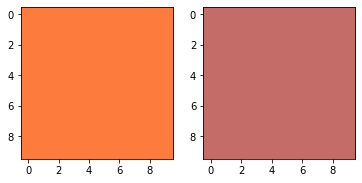

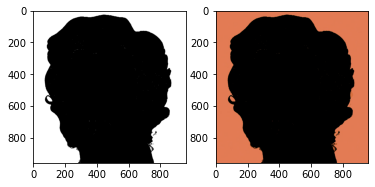

In [261]:
#define range for background orange
light_orange = color_range_min
dark_orange = color_range_max
lo_square = np.full((10, 10, 3), light_orange, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_orange, dtype=np.uint8) / 255.0
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

#get selected region
mask = cv2.inRange(hsv_img, color_range_min, color_range_max)
background = cv2.bitwise_and(img, img, mask=mask)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(background)
plt.show()

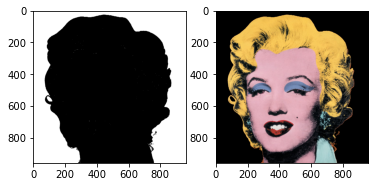

In [262]:
#get selected region
reverse_mask = cv2.bitwise_not(mask)
no_background = cv2.bitwise_and(img, img, mask=reverse_mask)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(no_background)
plt.show()

In [263]:
# Define the coordinates of the region of interest (ROI)
x1, y1 = 300, 100  # Top-left corner
x2, y2 = 400, 150  # Bottom-right corner

# Crop the image
cropped_image = no_background[y1:y2, x1:x2]

# Find the color range in the image
color_range_min, color_range_max = find_color_range(cropped_image)

# Print the minimum and maximum values for each channel
h_min, s_min, v_min = color_range_min
h_max, s_max, v_max = color_range_max
print(f"Color Range (Min): H={h_min}, S={s_min}, V={v_min}")
print(f"Color Range (Max): H={h_max}, S={s_max}, V={v_max}")

Color Range (Min): H=14, S=50, V=40
Color Range (Max): H=64, S=255, V=255


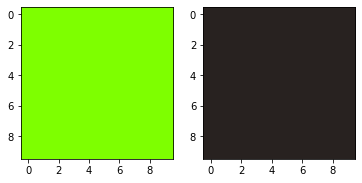

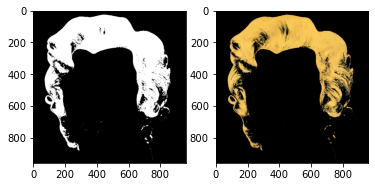

In [264]:
#define range for hair yellow
light_yellow = (14, 50, 40)
dark_yellow = (64, 255, 255)
lo_square = np.full((10, 10, 3), light_yellow, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_yellow, dtype=np.uint8) / 255.0
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

#get selected region
mask_hair = cv2.inRange(hsv_img, light_yellow, dark_yellow)
hair = cv2.bitwise_and(no_background, no_background, mask=mask_hair)
plt.subplot(1, 2, 1)
plt.imshow(mask_hair, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(hair)
plt.show()

#get pixel colors
pixel_colors = hair.reshape((np.shape(hair)[0]*np.shape(hair)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

## red picture 

In [129]:
req = urllib.request.urlopen(red_link)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is'

In [130]:
# Convert image to matrix
image_matrix = np.array(img)

# Display the shape of the matrix
print(image_matrix.shape)

(960, 960, 4)


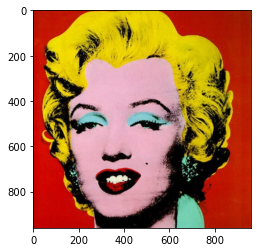

In [131]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [170]:
# Define the coordinates of the region of interest (ROI)
x1, x2 = 0, 20  
y1, y2 = 0, 900 

x3, x4 = 920, 940  
y3, y4 = 0, 900 

# Crop the image
cropped_image = img[y1:y2, x1:x2] 
cropped_image2 = img[y3:y4, x3:x4]

im_h = cv2.hconcat([cropped_image, cropped_image2])

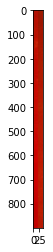

In [171]:
plt.imshow(im_h)
plt.show()
#cropped_image

In [172]:
# Load the image
image = im_h
# Find the color range in the image
color_range_min, color_range_max = find_color_range(image)

# Print the minimum and maximum values for each channel
h_min, s_min, v_min = color_range_min
h_max, s_max, v_max = color_range_max
print(f"Color Range (Min): H={h_min}, S={s_min}, V={v_min}")
print(f"Color Range (Max): H={h_max}, S={s_max}, V={v_max}")


Color Range (Min): H=0, S=239, V=151
Color Range (Max): H=6, S=255, V=216


In [173]:
# Find the color range in the image
color_range_min, color_range_max = find_color_range(image)
color_range_min = convert_to_numerical_tuple(color_range_min)
color_range_max = convert_to_numerical_tuple(color_range_max)

In [174]:
#convert imgage to hsv type
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

## Backgroup range

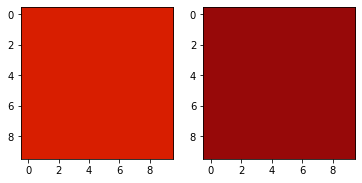

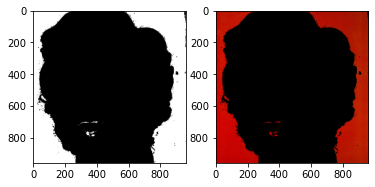

In [175]:
#define range for background orange
light_orange = color_range_min
dark_orange = color_range_max
lo_square = np.full((10, 10, 3), light_orange, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_orange, dtype=np.uint8) / 255.0
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

#get selected region
mask = cv2.inRange(hsv_img, color_range_min, color_range_max)
background = cv2.bitwise_and(img, img, mask=mask)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(background)
plt.show()

## turq picture

In [310]:
req = urllib.request.urlopen(turq_link)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is'

In [311]:
# Convert image to matrix
image_matrix = np.array(img)
# Display the shape of the matrix
print(image_matrix.shape)

(960, 960, 4)


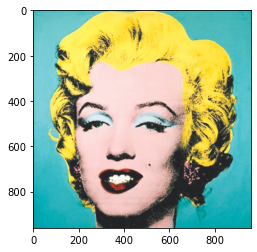

In [312]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [313]:
# Define the coordinates of the region of interest (ROI)
x1, x2 = 0, 20  
y1, y2 = 0, 900 

x3, x4 = 920, 940  
y3, y4 = 0, 900 

# Crop the image
cropped_image = img[y1:y2, x1:x2] 
cropped_image2 = img[y3:y4, x3:x4]

im_h = cv2.hconcat([cropped_image, cropped_image2])

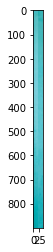

In [314]:
plt.imshow(im_h)
plt.show()
#cropped_image

In [315]:
# Load the image
image = im_h
# Find the color range in the image
color_range_min, color_range_max = find_color_range(image)

# Print the minimum and maximum values for each channel
h_min, s_min, v_min = color_range_min
h_max, s_max, v_max = color_range_max
print(f"Color Range (Min): H={h_min}, S={s_min}, V={v_min}")
print(f"Color Range (Max): H={h_max}, S={s_max}, V={v_max}")

Color Range (Min): H=88, S=100, V=158
Color Range (Max): H=95, S=255, V=224


In [316]:
# Find the color range in the image
color_range_min, color_range_max = find_color_range(image)
color_range_min = convert_to_numerical_tuple(color_range_min)
color_range_max = convert_to_numerical_tuple(color_range_max)

In [317]:
#convert imgage to hsv type
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

## Background range

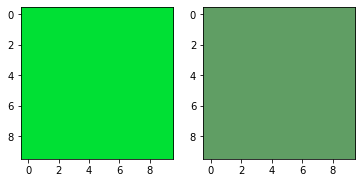

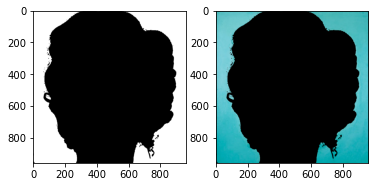

In [318]:
#define range for background orange
light_orange = color_range_min
dark_orange = color_range_max
lo_square = np.full((10, 10, 3), light_orange, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_orange, dtype=np.uint8) / 255.0
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

#get selected region
mask = cv2.inRange(hsv_img, color_range_min, color_range_max)
background = cv2.bitwise_and(img, img, mask=mask)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(background)
plt.show()

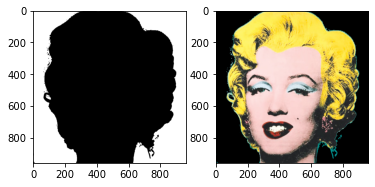

In [319]:
#get selected region
reverse_mask = cv2.bitwise_not(mask)
no_background = cv2.bitwise_and(img, img, mask=reverse_mask)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(no_background)
plt.show()

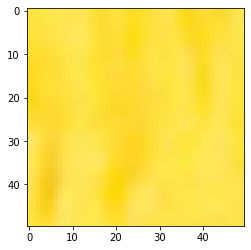

In [320]:
# Define the coordinates of the region of interest (ROI)
x1, y1 = 500, 100  # Top-left corner
x2, y2 = 550, 150  # Bottom-right corner

# Crop the image
cropped_image = no_background[y1:y2, x1:x2]

plt.imshow(cropped_image)
plt.show()

In [321]:
# Define the coordinates of the region of interest (ROI)
x1, y1 = 450, 100  # Top-left corner
x2, y2 = 500, 150  # Bottom-right corner

# Crop the image
cropped_image = no_background[y1:y2, x1:x2]

# Find the color range in the image
color_range_min, color_range_max = find_color_range(cropped_image)

# Print the minimum and maximum values for each channel
h_min, s_min, v_min = color_range_min
h_max, s_max, v_max = color_range_max
print(f"Color Range (Min): H={h_min}, S={s_min}, V={v_min}")
print(f"Color Range (Max): H={h_max}, S={s_max}, V={v_max}")

Color Range (Min): H=0, S=3, V=37
Color Range (Max): H=177, S=255, V=255


In [322]:
# Find the color range in the image
color_range_min, color_range_max = find_color_range(image)
color_range_min = convert_to_numerical_tuple(color_range_min)
color_range_max = convert_to_numerical_tuple(color_range_max)

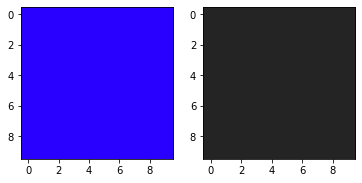

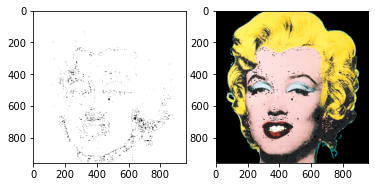

In [305]:
#define range for hair yellow
light_yellow = (0,3,37)
dark_yellow = (177,255,255)
lo_square = np.full((10, 10, 3), light_yellow, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_yellow, dtype=np.uint8) / 255.0
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

#get selected region
mask_hair = cv2.inRange(hsv_img, light_yellow, dark_yellow)
hair = cv2.bitwise_and(no_background, no_background, mask=mask_hair)
plt.subplot(1, 2, 1)
plt.imshow(mask_hair, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(hair)
plt.show()

#get pixel colors
pixel_colors = hair.reshape((np.shape(hair)[0]*np.shape(hair)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

# blue picture

In [105]:
req = urllib.request.urlopen(blue_link)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is'

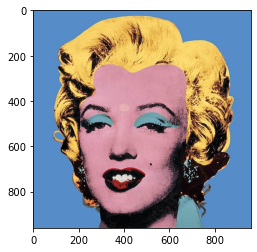

In [106]:
# Convert image to matrix
image_matrix = np.array(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

## Face

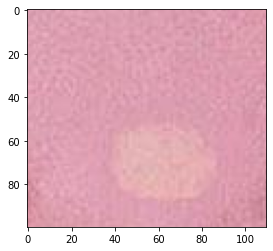

In [130]:
# Define the coordinates of the region of interest (ROI)
x1, x2 = 340, 450 
y1, y2 = 360,  460

# Crop the image
cropped_image = img[y1:y2, x1:x2] 
#cropped_image2 = img[y3:y4, x3:x4]


#im_h = cv2.hconcat([cropped_image, cropped_image2])
plt.imshow(cropped_image)
plt.show()


In [67]:
# Load the image
image = cropped_image2
# Find the color range in the image
color_range_min, color_range_max = find_color_range(image)

# Print the minimum and maximum values for each channel
h_min, s_min, v_min = color_range_min
h_max, s_max, v_max = color_range_max
print(f"Color Range (Min): H={h_min}, S={s_min}, V={v_min}")
print(f"Color Range (Max): H={h_max}, S={s_max}, V={v_max}")

Color Range (Min): H=0, S=50, V=217
Color Range (Max): H=179, S=65, V=241


In [71]:
# Find the color range in the image
color_range_min, color_range_max = find_color_range(image)
color_range_min = convert_to_numerical_tuple(color_range_min)
color_range_max = convert_to_numerical_tuple(color_range_max)




In [79]:
#convert imgage to hsv type
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)


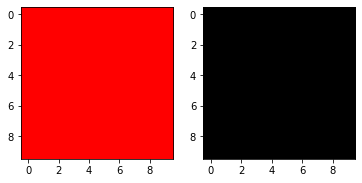

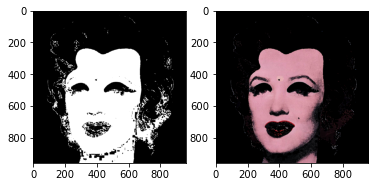

In [100]:
#define range for background orange
light_orange = (110, 40, 0)
dark_orange = (255, 255, 255)
lo_square = np.full((10, 10, 3), light_orange, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_orange, dtype=np.uint8) / 255.0
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

#get selected region
mask = cv2.inRange(hsv_img, light_orange, dark_orange)
background = cv2.bitwise_and(img, img, mask=mask)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(background)
plt.show()

## gun shot

In [ ]:
# Define the coordinates of the region of interest (ROI)
x1, x2 = 370, 450 
y1, y2 = 370, 450 

# Crop the image
cropped_image = img[y1:y2, x1:x2] 
#cropped_image2 = img[y3:y4, x3:x4]


#im_h = cv2.hconcat([cropped_image, cropped_image2])
plt.imshow(cropped_image)
plt.show()

#cropped_image 2
x1, x2 = 20, 40 
y1, y2 = 50, 70 
cropped_image2 = cropped_image[y1:y2, x1:x2]

#im_h = cv2.hconcat([cropped_image, cropped_image2])
plt.imshow(cropped_image2)
plt.show()

In [24]:
# Load the image
image = cropped_image2
# Find the color range in the image
color_range_min, color_range_max = find_color_range(image)

# Print the minimum and maximum values for each channel
h_min, s_min, v_min = color_range_min
h_max, s_max, v_max = color_range_max
print(f"Color Range (Min): H={h_min}, S={s_min}, V={v_min}")
print(f"Color Range (Max): H={h_max}, S={s_max}, V={v_max}")

Color Range (Min): H=0, S=50, V=217
Color Range (Max): H=179, S=65, V=241


In [27]:
# Find the color range in the image
color_range_min, color_range_max = find_color_range(image)
color_range_min = convert_to_numerical_tuple(color_range_min)
color_range_max = convert_to_numerical_tuple(color_range_max)
#convert imgage to hsv type
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

### Background range

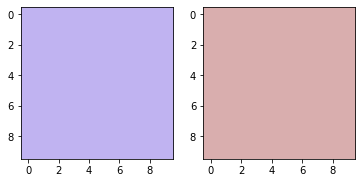

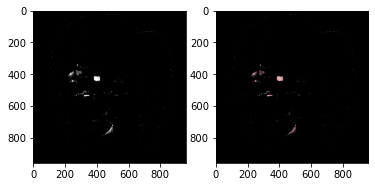

In [28]:
#define range for background orange
light_orange = color_range_min
dark_orange = color_range_max
lo_square = np.full((10, 10, 3), light_orange, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_orange, dtype=np.uint8) / 255.0
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

#get selected region
mask = cv2.inRange(hsv_img, color_range_min, color_range_max)
background = cv2.bitwise_and(img, img, mask=mask)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(background)
plt.show()

## eggblue picture

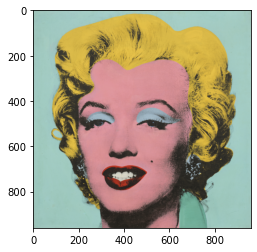

In [207]:
req = urllib.request.urlopen(eggblue_link)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is'
# Convert image to matrix
image_matrix = np.array(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

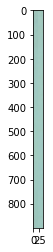

In [201]:
# Define the coordinates of the region of interest (ROI)
x1, x2 = 0, 20  
y1, y2 = 0, 900 

x3, x4 = 920, 940  
y3, y4 = 0, 900 

# Crop the image
cropped_image = img[y1:y2, x1:x2] 
cropped_image2 = img[y3:y4, x3:x4]

im_h = cv2.hconcat([cropped_image, cropped_image2])
plt.imshow(im_h)
plt.show()
#cropped_image

In [202]:
# Load the image
image = im_h
# Find the color range in the image
color_range_min, color_range_max = find_color_range(image)

# Print the minimum and maximum values for each channel
h_min, s_min, v_min = color_range_min
h_max, s_max, v_max = color_range_max
print(f"Color Range (Min): H={h_min}, S={s_min}, V={v_min}")
print(f"Color Range (Max): H={h_max}, S={s_max}, V={v_max}")

Color Range (Min): H=0, S=0, V=171
Color Range (Max): H=88, S=60, V=255


In [203]:
# Find the color range in the image
color_range_min, color_range_max = find_color_range(image)
color_range_min = convert_to_numerical_tuple(color_range_min)
color_range_max = convert_to_numerical_tuple(color_range_max)
#convert imgage to hsv type
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

### Background range

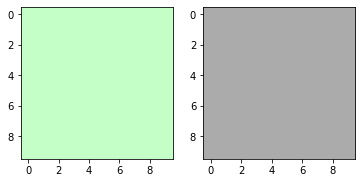

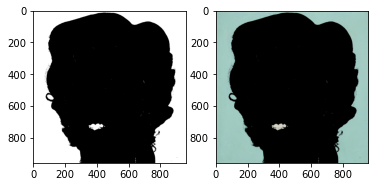

In [204]:
#define range for background orange
light_orange = color_range_min
dark_orange = color_range_max
lo_square = np.full((10, 10, 3), light_orange, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_orange, dtype=np.uint8) / 255.0
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

#get selected region
mask = cv2.inRange(hsv_img, color_range_min, color_range_max)
background = cv2.bitwise_and(img, img, mask=mask)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(background)
plt.show()

In [38]:
# Convert the HSV image to RGB
rgb_hair = cv2.cvtColor(hair, cv2.COLOR_HSV2BGR)

# Extract the individual color channels
red_channel = rgb_hair[:,:,2]
green_channel = rgb_hair[:,:,1]
blue_channel = rgb_hair[:,:,0]

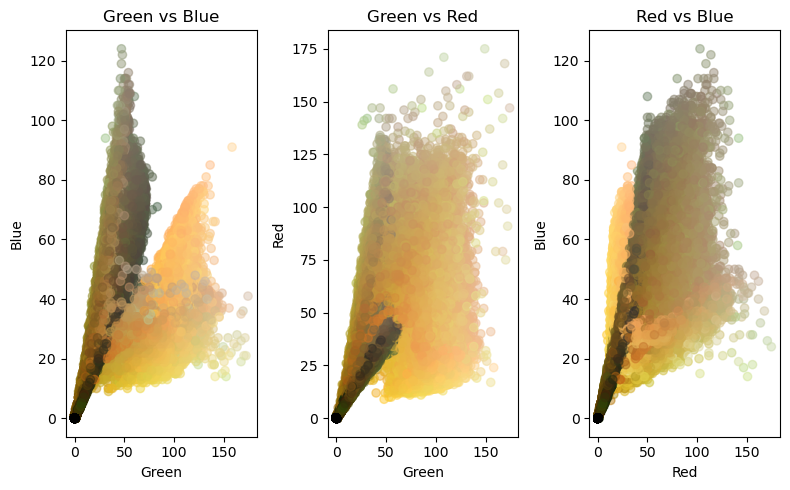

In [ ]:
# Create scatter plots for each color combination
plt.figure(figsize=(8, 5))

# Green vs Blue
plt.subplot(1, 3, 1)
plt.scatter(green_channel.flatten(), blue_channel.flatten(), c=pixel_colors, alpha=0.5)
plt.xlabel("Green")
plt.ylabel("Blue")
plt.title("Green vs Blue")

# Green vs Red
plt.subplot(1, 3, 2)
plt.scatter(green_channel.flatten(), red_channel.flatten(), c=pixel_colors, alpha=0.5)
plt.xlabel("Green")
plt.ylabel("Red")
plt.title("Green vs Red")

# Red vs Blue
plt.subplot(1, 3, 3)
plt.scatter(red_channel.flatten(), blue_channel.flatten(), c=pixel_colors, alpha=0.5)
plt.xlabel("Red")
plt.ylabel("Blue")
plt.title("Red vs Blue")

plt.tight_layout()
plt.show()

In [ ]:
df2 = pd.DataFrame({"Red_int": red_channel.flatten(), 
                    "Green_int": green_channel.flatten(), 
                    "Blue_int": blue_channel.flatten()})
df2[["Red", "Green", "Blue"]] = df_temp[["Red_Group", "Green_Group", "Blue_Group"]]
df2["color"] = df_temp['colour']
df2["pixel_colors"] = pixel_colors
df2 = df2[(df2['Red_int'] != 0) & (df2['Green_int'] != 0) & (df2['Blue_int'] != 0) & (df2['pixel_colors'] != "[0.0, 0.0, 0.0]"
) ]#& (df2['Red'] != "NaN") & (df2['Green'] != "NaN") & (df2['Blue'] != "NaN") ]
df2 = df2.dropna()

# Remove duplicate rows based on the specified columns
df2[["Red", "Green", "Blue"]] = df2[["Red", "Green", "Blue"]].astype(int)
df2.drop_duplicates(subset=['Red', 'Green', 'Blue'], keep='first', inplace=True)

#df2 = df2.sample(frac=0.01)
df2

,Red_int,Green_int,Blue_int,Red,Green,Blue,color,pixel_colors
28277,64,71,31,13,8,4,#d68d47,"[0.0, 0.0, 0.0]"
28279,63,72,31,13,9,4,#d79048,"[0.0, 0.0, 0.0]"
29235,41,88,31,14,10,5,#eaa258,"[0.0, 0.0, 0.0]"
29258,45,84,31,14,9,5,#e79f54,"[0.0, 0.0, 0.0]"
30193,33,89,26,14,11,5,#ecb159,"[0.0, 0.0, 0.0]"
...,...,...,...,...,...,...,...,...
826794,47,66,28,14,8,4,#e08e42,"[0.0, 0.0, 0.0]"
826838,28,16,18,10,6,1,#ae6a1c,"[0.0, 0.0, 0.0]"
872425,146,129,45,12,10,9,#ccae91,"[0.0, 0.0, 0.0]"
885868,162,133,40,12,11,10,#cabea1,"[0.0, 0.0, 0.0]"


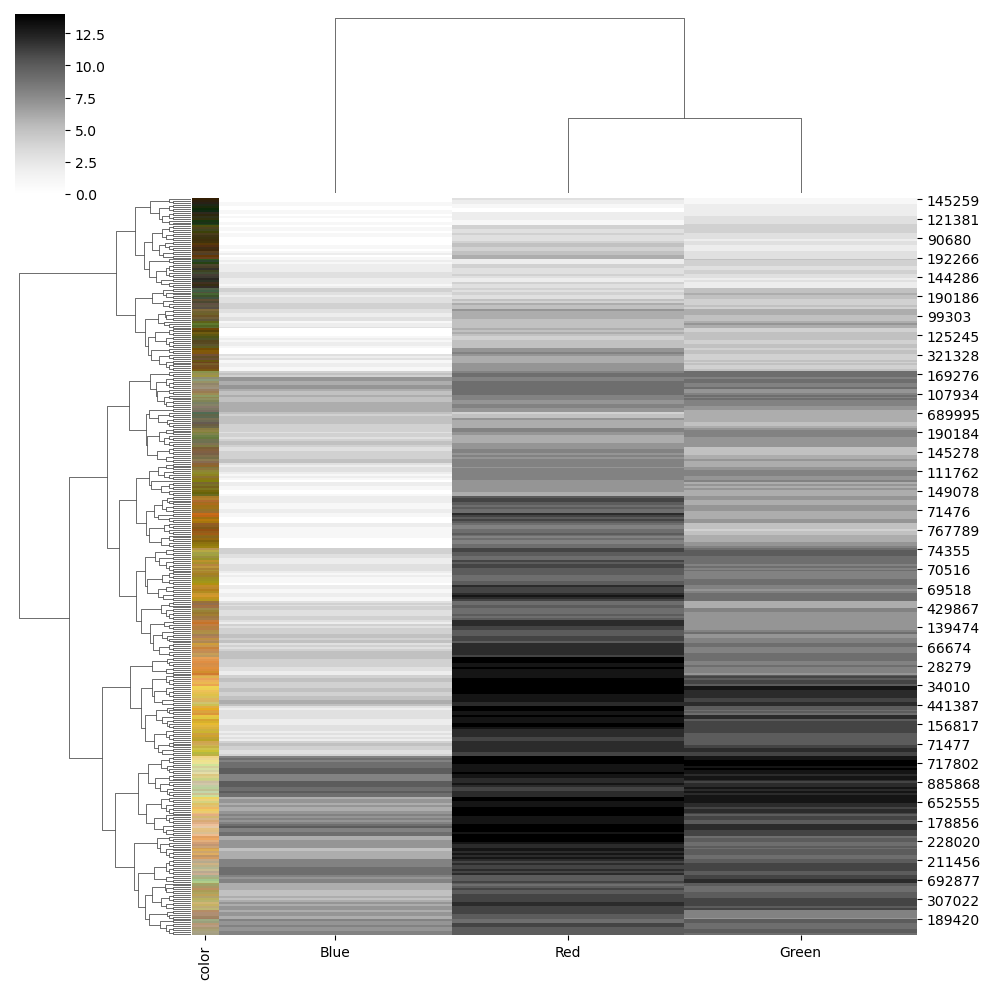

In [ ]:
sns.clustermap(df2[["Red", "Green", "Blue"]], row_colors = df2["color"],cmap="Greys")

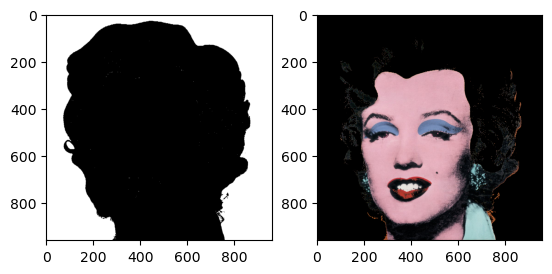

In [ ]:
#get selected region
reverse_mask = cv2.bitwise_not(mask_hair)
face = cv2.bitwise_and(no_background, no_background, mask=reverse_mask)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(face)
plt.show()

In [ ]:
# Define the coordinates of the region of interest (ROI)
x1, y1 = 420, 420  # Top-left corner
x2, y2 = 490, 490  # Bottom-right corner

# Crop the image
cropped_image = no_background[y1:y2, x1:x2]

# Find the color range in the image
color_range_min, color_range_max = find_color_range(cropped_image)

# Print the minimum and maximum values for each channel
h_min, s_min, v_min = color_range_min
h_max, s_max, v_max = color_range_max
print(f"Color Range (Min): H={h_min}, S={s_min}, V={v_min}")
print(f"Color Range (Max): H={h_max}, S={s_max}, V={v_max}")

Color Range (Min): H=0, S=17, V=44
Color Range (Max): H=179, S=124, V=234


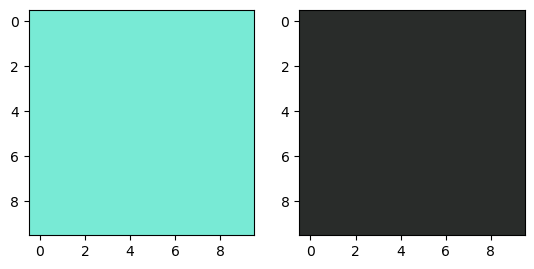

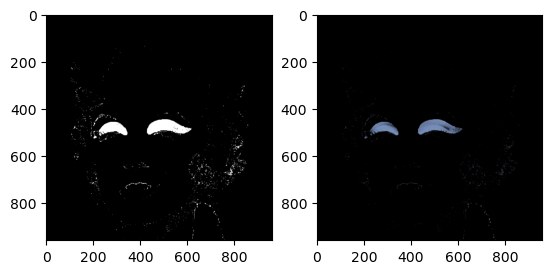

In [ ]:
#define range for hair yellow
light_yellow = (100, 17, 44)
dark_yellow = (120, 124, 234)
lo_square = np.full((10, 10, 3), light_yellow, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_yellow, dtype=np.uint8) / 255.0
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

#get selected region
mask_hair = cv2.inRange(hsv_img, light_yellow, dark_yellow)
hair = cv2.bitwise_and(no_background, no_background, mask=mask_hair)
plt.subplot(1, 2, 1)
plt.imshow(mask_hair, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(hair)
plt.show()

#get pixel colors
pixel_colors = hair.reshape((np.shape(hair)[0]*np.shape(hair)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

In [ ]:
# Convert the HSV image to RGB
rgb_face = cv2.cvtColor(face, cv2.COLOR_HSV2BGR)
#extract the pixel colors
pixel_colors = face.reshape((np.shape(face)[0]*np.shape(face)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

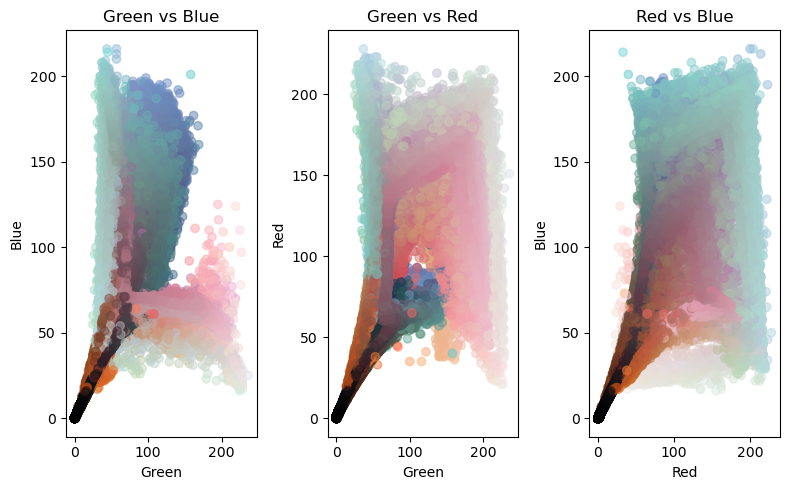

In [ ]:
# Extract the individual color channels
red_channel = rgb_face[:,:,2]
green_channel = rgb_face[:,:,1]
blue_channel = rgb_face[:,:,0]

# Create scatter plots for each color combination
plt.figure(figsize=(8, 5))

# Green vs Blue
plt.subplot(1, 3, 1)
plt.scatter(green_channel.flatten(), blue_channel.flatten(), c=pixel_colors, alpha=0.5)
plt.xlabel("Green")
plt.ylabel("Blue")
plt.title("Green vs Blue")

# Green vs Red
plt.subplot(1, 3, 2)
plt.scatter(green_channel.flatten(), red_channel.flatten(), c=pixel_colors, alpha=0.5)
plt.xlabel("Green")
plt.ylabel("Red")
plt.title("Green vs Red")

# Red vs Blue
plt.subplot(1, 3, 3)
plt.scatter(red_channel.flatten(), blue_channel.flatten(), c=pixel_colors, alpha=0.5)
plt.xlabel("Red")
plt.ylabel("Blue")
plt.title("Red vs Blue")

plt.tight_layout()
plt.show()

In [ ]:
df3 = pd.DataFrame({"Red_int": red_channel.flatten(), 
                    "Green_int": green_channel.flatten(), 
                    "Blue_int": blue_channel.flatten()})
df3[["Red", "Green", "Blue"]] = df_temp[["Red_Group", "Green_Group", "Blue_Group"]]
df3["color"] = df_temp['colour']
df3["pixel_colors"] = pixel_colors
df3 = df3[(df3['Red_int'] != 0) & (df3['Green_int'] != 0) & (df3['Blue_int'] != 0) & (df3['pixel_colors'] != "[0.0, 0.0, 0.0]")]
df3 = df3.dropna()

# Remove duplicate rows based on the specified columns
df3[["Red", "Green", "Blue"]] = df3[["Red", "Green", "Blue"]].astype(int)
df3.drop_duplicates(subset=['Red', 'Green', 'Blue'], keep='first', inplace=True)

#df3 = df3.sample(frac=0.001)
df3

,Red_int,Green_int,Blue_int,Red,Green,Blue,color,pixel_colors
28277,64,71,31,13,8,4,#d68d47,"[0.0, 0.0, 0.0]"
28279,63,72,31,13,9,4,#d79048,"[0.0, 0.0, 0.0]"
29235,41,88,31,14,10,5,#eaa258,"[0.0, 0.0, 0.0]"
29258,45,84,31,14,9,5,#e79f54,"[0.0, 0.0, 0.0]"
30193,33,89,26,14,11,5,#ecb159,"[0.0, 0.0, 0.0]"
...,...,...,...,...,...,...,...,...
826794,47,66,28,14,8,4,#e08e42,"[0.0, 0.0, 0.0]"
826838,28,16,18,10,6,1,#ae6a1c,"[0.0, 0.0, 0.0]"
872425,146,129,45,12,10,9,#ccae91,"[0.0, 0.0, 0.0]"
885868,162,133,40,12,11,10,#cabea1,"[0.0, 0.0, 0.0]"


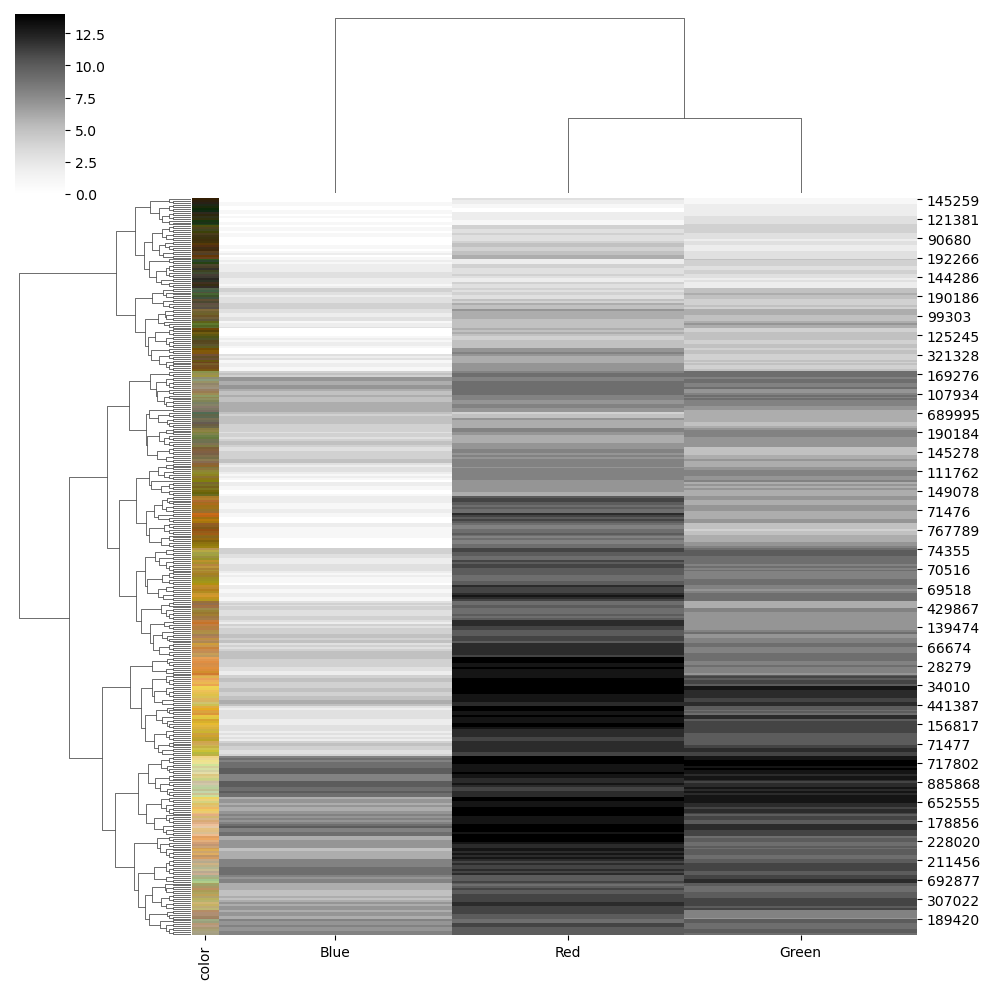

In [ ]:
sns.clustermap(df3[["Red", "Green", "Blue"]], row_colors = df3["color"],cmap= 'Greys')